## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 

## Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.


## Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.

 
<code>from sklearn.metrics import r2_score
r2_score(y_test, y_pred)</code>

 - where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
 - Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.

### The steps we will follow in this exercise are as follows.

1. Reading, understanding and visualising the data.
2. Preparing the data for modeling(train-test split, rescaling etc)
3. Training the model
4. Residual analysis
5. Prediction and evaluation on test set

## Step 1: Reading, Understanding and visualizing the data

In [379]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [380]:
bikes=pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [381]:
bikes.shape

(730, 16)

In [382]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


1.1 Check if there are any missing values in dataframe

In [383]:
#No Use
bikes.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [384]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Its great there are no missing values in any variable

### Lets start droping unncessory variables. This decision is totally based on our understanding of bussiness.

In [385]:
# From above describe details we can see that temp and atemp values are increasing like 3+, 4+ or 5+ type. so it 
# means they can be highly corelated. Lets check it first
bikes['temp'].corr(bikes['atemp'])

0.9916961786905648

### So we can drop on item. Lets take atemp. Because it represent feel temprature

 ### Drop few variables also because these variables don't play a importent role in our analysis
 - drop 'instant', there is no use of this indexing
 - drop 'dteday', we already have year, month variable which help us to understand bike demand as per time
 - drop 'casual' and 'registered' we have cnt variable which will help us to understand the companie's total bike demands. We are not looking for casual and registered seperately.

In [386]:
bikes=bikes.drop(['instant','dteday','casual','registered','temp'],axis=1)

In [387]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [388]:
bikes.shape

(730, 11)

In [389]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


#### As per dictionary provided for bike data set. Season have four types and it categorical but it looks like numeric in data set. So we should make it categorical or object which help us in analysis

### Same applied for yr(only 0 and 1 which represent 2018 and 2019 respectively).

### Lets look in dictionary again findout that mnth, holiday, weekday, wethersit are also categorical variable hence these variable data type should not be numeric. 

### Convert these variables into categorical variables

In [390]:
bikes[['season','yr','mnth','holiday','weekday','workingday','weathersit']]=bikes[['season','yr','mnth','holiday','weekday','workingday','weathersit']].astype('object')

In [391]:
#Check info whether converted into categorical variables or not.
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 62.9+ KB


In [392]:
bikes.describe()

,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,23.726322,62.765175,12.763620,4508.006849
std,8.150308,14.237589,5.195841,1936.011647
min,3.953480,0.000000,1.500244,22.000000
25%,16.889713,52.000000,9.041650,3169.750000
50%,24.368225,62.625000,12.125325,4548.500000
75%,30.445775,72.989575,15.625589,5966.000000
max,42.044800,97.250000,34.000021,8714.000000


### Lets replace these numeric values to categorical values. Check Dictionary for better understading. 

In [393]:
# Season have 1:spring, 2:summer, 3:fall, 4:winter
bikes.season=bikes.season.replace([1, 2, 3, 4], ['spring', 'summer', 'fall', 'winter'])

In [394]:
# year (0: 2018, 1:2019)
bikes.yr=bikes.yr.replace([0, 1], ['yr_2018', 'yr_2019'])

In [395]:
# Month from 1 to 12 represent Jan to Dec respectively
bikes.mnth=bikes.mnth.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan','Feb','March','April','May','June','July','Aug','Sep','Oct','Nov','Dec'])

In [396]:
# Weekday from 1 to 6 represent Monday to Sunday respectively
bikes.weekday=bikes.weekday.replace([0,1,2,3,4,5,6], ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [397]:
# If day is neither weekend nor holiday is 1, otherwise is 0.
bikes.workingday=bikes.workingday.replace([1, 0], ['working_day', 'not_working_day'])

In [398]:
# weather day is a holiday or not
bikes.holiday=bikes.holiday.replace([0, 1], ['not_holiday', 'holiday'])

In [399]:
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy,
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
bikes.weathersit=bikes.weathersit.replace([1, 2, 3,4], ['Clear', 'Mist','Light Snow','Heavy Rain'])

### Now lets look our data set, how it looks like

In [400]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,yr_2018,Jan,not_holiday,Sunday,not_working_day,Mist,18.18125,80.5833,10.749882,985
1,spring,yr_2018,Jan,not_holiday,Monday,not_working_day,Mist,17.68695,69.6087,16.652113,801
2,spring,yr_2018,Jan,not_holiday,Tuesday,working_day,Clear,9.47025,43.7273,16.636703,1349
3,spring,yr_2018,Jan,not_holiday,Wednesday,working_day,Clear,10.60610,59.0435,10.739832,1562
4,spring,yr_2018,Jan,not_holiday,Thursday,working_day,Clear,11.46350,43.6957,12.522300,1600


In [401]:
bikes.describe()

,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,23.726322,62.765175,12.763620,4508.006849
std,8.150308,14.237589,5.195841,1936.011647
min,3.953480,0.000000,1.500244,22.000000
25%,16.889713,52.000000,9.041650,3169.750000
50%,24.368225,62.625000,12.125325,4548.500000
75%,30.445775,72.989575,15.625589,5966.000000
max,42.044800,97.250000,34.000021,8714.000000


### We have 4 numerical values and 7 categorical variables

### Lets start visualizing the data and check In Linear Regression Model cnt(Dependent/target variable) in some way dependent on any other (independent/predictor) variable.

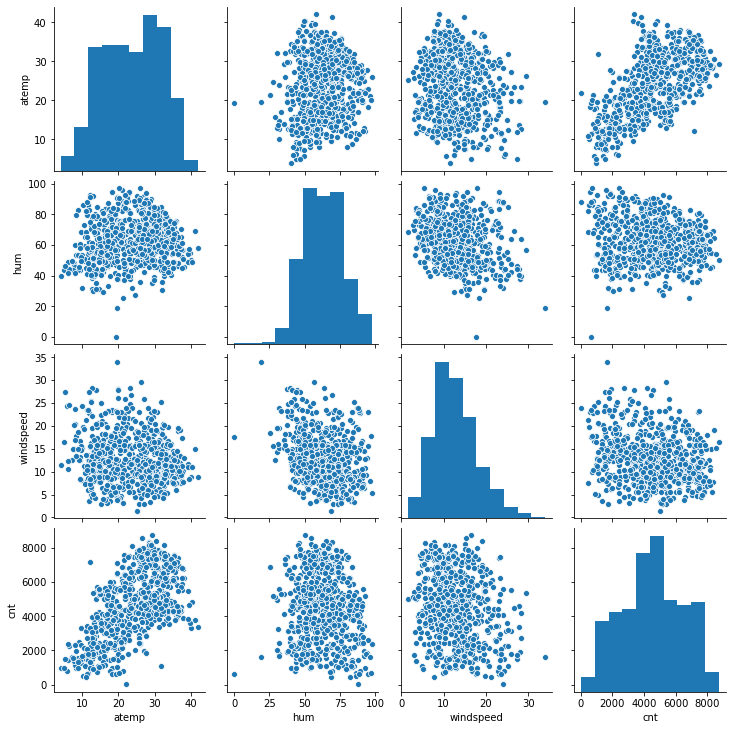

In [402]:
#visualizing the numerical variable
sns.pairplot(bikes)
plt.show()

### Look at atemp & cnt scatter plot. There is some sort of positive correlation. Which means that some of the variance in cnt is explained by atemp.

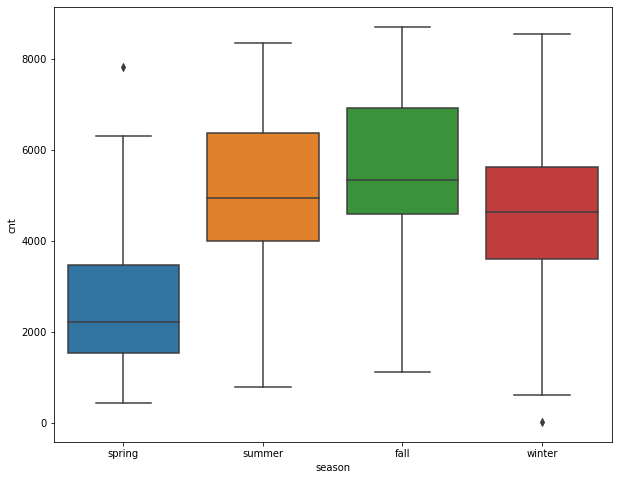

In [403]:
#Lets visualizing the categorial variable
plt.figure(figsize=(10,8))
sns.boxplot(x='season',y='cnt',data=bikes)
plt.show()

### From above boxplot we can have a note that in fall, summer and winter demand is high whilein spring its down. It means season have good impact on our bikes demand

### Lets create box plot for all categorical variables

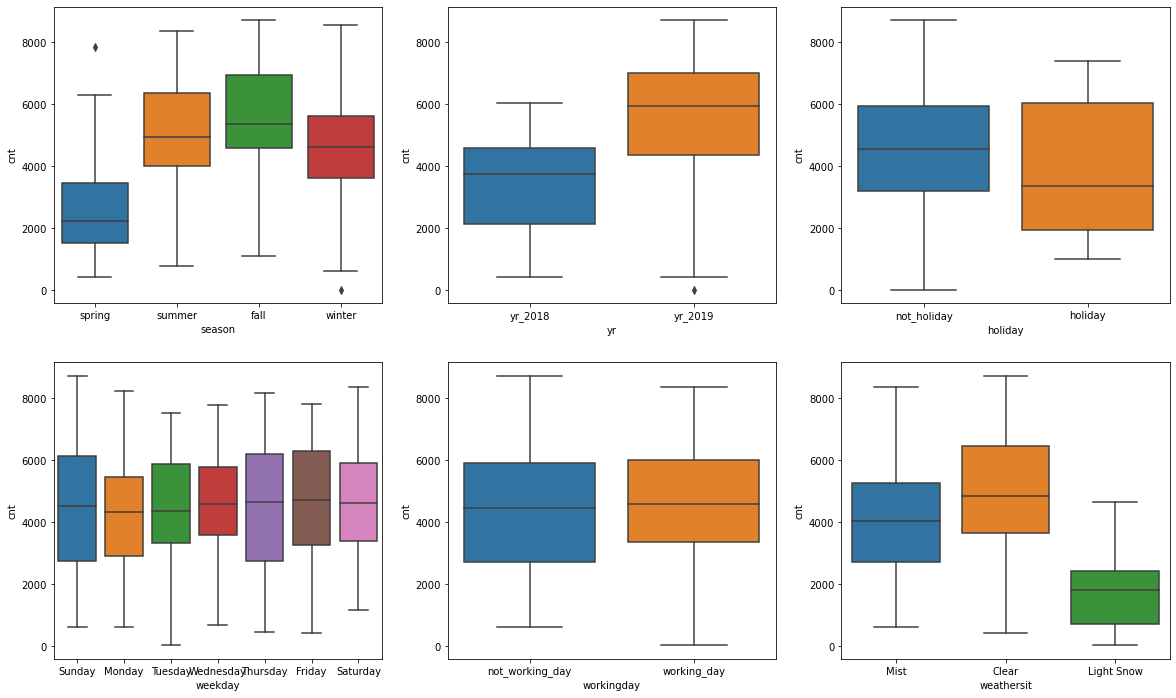

In [404]:
#visualising all box plot with below codes
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data =bikes)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

### From above canvas of boxplot we can have basic idea that in year 2019 demand is high, not_holiday time demands is also high etc.

### Note
If model tells you about that mainroad and airconditioning are importent variable in price prediction then you are comfrotable with these plots and have a cross check for your analysis

## Step 2: Preparing the data for Modeling

- Encoding:
    - Converting binary categorical variables to one and zeros    
    - Converting other categorical variables to dummy variables
- Spliting into train and test
- Rescaling of variables

In [251]:
# Creating dummy variables for furnishing status
status=pd.get_dummies(bikes['season'])
status.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [252]:
# Creating dummy variables for furnishing status
# dropping a redundent dummy variables
status=pd.get_dummies(bikes['season'],drop_first=True)
status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [253]:
# concat the dummy df with the original data
bikes=pd.concat([bikes,status],axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,yr_2018,mnth_1,not_holiday,Sunday,not_working_day,whether_2,18.18125,80.5833,10.749882,985,1,0,0
1,spring,yr_2018,mnth_1,not_holiday,Monday,not_working_day,whether_2,17.68695,69.6087,16.652113,801,1,0,0
2,spring,yr_2018,mnth_1,not_holiday,Tuesday,working_day,whether_1,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,yr_2018,mnth_1,not_holiday,Wednesday,working_day,whether_1,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,yr_2018,mnth_1,not_holiday,Thursday,working_day,whether_1,11.46350,43.6957,12.522300,1600,1,0,0


In [255]:
bikes=bikes.drop('season',axis=1)
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,yr_2018,mnth_1,not_holiday,Sunday,not_working_day,whether_2,18.18125,80.5833,10.749882,985,1,0,0
1,yr_2018,mnth_1,not_holiday,Monday,not_working_day,whether_2,17.68695,69.6087,16.652113,801,1,0,0
2,yr_2018,mnth_1,not_holiday,Tuesday,working_day,whether_1,9.47025,43.7273,16.636703,1349,1,0,0
3,yr_2018,mnth_1,not_holiday,Wednesday,working_day,whether_1,10.60610,59.0435,10.739832,1562,1,0,0
4,yr_2018,mnth_1,not_holiday,Thursday,working_day,whether_1,11.46350,43.6957,12.522300,1600,1,0,0


In [256]:
# Creating dummy variables for furnishing status
# dropping a redundent dummy variables
status=pd.get_dummies(bikes['yr'],drop_first=True)
status.head()

,yr_2019
0,0
1,0
2,0
3,0
4,0


In [257]:
# concat the dummy df with the original data
bikes=pd.concat([bikes,status],axis=1)
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,yr_2019
0,yr_2018,mnth_1,not_holiday,Sunday,not_working_day,whether_2,18.18125,80.5833,10.749882,985,1,0,0,0
1,yr_2018,mnth_1,not_holiday,Monday,not_working_day,whether_2,17.68695,69.6087,16.652113,801,1,0,0,0
2,yr_2018,mnth_1,not_holiday,Tuesday,working_day,whether_1,9.47025,43.7273,16.636703,1349,1,0,0,0
3,yr_2018,mnth_1,not_holiday,Wednesday,working_day,whether_1,10.60610,59.0435,10.739832,1562,1,0,0,0
4,yr_2018,mnth_1,not_holiday,Thursday,working_day,whether_1,11.46350,43.6957,12.522300,1600,1,0,0,0


In [258]:
bikes=bikes.drop('yr',axis=1)
bikes.head()

,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,yr_2019
0,mnth_1,not_holiday,Sunday,not_working_day,whether_2,18.18125,80.5833,10.749882,985,1,0,0,0
1,mnth_1,not_holiday,Monday,not_working_day,whether_2,17.68695,69.6087,16.652113,801,1,0,0,0
2,mnth_1,not_holiday,Tuesday,working_day,whether_1,9.47025,43.7273,16.636703,1349,1,0,0,0
3,mnth_1,not_holiday,Wednesday,working_day,whether_1,10.60610,59.0435,10.739832,1562,1,0,0,0
4,mnth_1,not_holiday,Thursday,working_day,whether_1,11.46350,43.6957,12.522300,1600,1,0,0,0


In [259]:
# Creating dummy variables for furnishing status
# dropping a redundent dummy variables
status=pd.get_dummies(bikes['mnth'],drop_first=True)
status.head()

,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [260]:
# concat the dummy df with the original data
bikes=pd.concat([bikes,status],axis=1)
bikes.head()

,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
0,mnth_1,not_holiday,Sunday,not_working_day,whether_2,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,0
1,mnth_1,not_holiday,Monday,not_working_day,whether_2,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,0
2,mnth_1,not_holiday,Tuesday,working_day,whether_1,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,0
3,mnth_1,not_holiday,Wednesday,working_day,whether_1,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,mnth_1,not_holiday,Thursday,working_day,whether_1,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [261]:
bikes=bikes.drop('mnth',axis=1)
bikes.head()

,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,...,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9
0,not_holiday,Sunday,not_working_day,whether_2,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,0
1,not_holiday,Monday,not_working_day,whether_2,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,0
2,not_holiday,Tuesday,working_day,whether_1,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,not_holiday,Wednesday,working_day,whether_1,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,not_holiday,Thursday,working_day,whether_1,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
# Creating dummy variables for furnishing status
# dropping a redundent dummy variables
status=pd.get_dummies(bikes['holiday'],drop_first=True)
status.head()

,not_holiday
0,1
1,1
2,1
3,1
4,1


In [263]:
# concat the dummy df with the original data
bikes=pd.concat([bikes,status],axis=1)
bikes.head()

,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,...,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,not_holiday
0,not_holiday,Sunday,not_working_day,whether_2,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,1
1,not_holiday,Monday,not_working_day,whether_2,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,1
2,not_holiday,Tuesday,working_day,whether_1,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,not_holiday,Wednesday,working_day,whether_1,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,1
4,not_holiday,Thursday,working_day,whether_1,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [264]:
bikes=bikes.drop('holiday',axis=1)
bikes.head()

,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,...,mnth_12,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,not_holiday
0,Sunday,not_working_day,whether_2,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Monday,not_working_day,whether_2,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Tuesday,working_day,whether_1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Wednesday,working_day,whether_1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Thursday,working_day,whether_1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [265]:
# Creating dummy variables for furnishing status
# dropping a redundent dummy variables
status=pd.get_dummies(bikes['weekday'],drop_first=True)
# concat the dummy df with the original data
bikes=pd.concat([bikes,status],axis=1)
bikes=bikes.drop('weekday',axis=1)
bikes.head()

,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,yr_2019,...,mnth_7,mnth_8,mnth_9,not_holiday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,not_working_day,whether_2,18.18125,80.5833,10.749882,985,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,not_working_day,whether_2,17.68695,69.6087,16.652113,801,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
2,working_day,whether_1,9.47025,43.7273,16.636703,1349,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,working_day,whether_1,10.60610,59.0435,10.739832,1562,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,working_day,whether_1,11.46350,43.6957,12.522300,1600,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [266]:
# Creating dummy variables for furnishing status
# dropping a redundent dummy variables
status=pd.get_dummies(bikes['workingday'],drop_first=True)
# concat the dummy df with the original data
bikes=pd.concat([bikes,status],axis=1)
bikes=bikes.drop('workingday',axis=1)
bikes.head()

,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,yr_2019,mnth_10,...,mnth_8,mnth_9,not_holiday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,working_day
0,whether_2,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,whether_2,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,whether_1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,whether_1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,whether_1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [267]:
# Creating dummy variables for furnishing status
# dropping a redundent dummy variables
status=pd.get_dummies(bikes['weathersit'],drop_first=True)
# concat the dummy df with the original data
bikes=pd.concat([bikes,status],axis=1)
bikes=bikes.drop('weathersit',axis=1)
bikes.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,yr_2019,mnth_10,mnth_11,...,not_holiday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,working_day,whether_2,whether_3
0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [283]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [284]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [285]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,yr_2019,mnth_10,mnth_11,...,not_holiday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,working_day,whether_2,whether_3
653,0.501133,0.575354,0.300794,0.864243,0,0,1,1,1,0,...,1,0,0,0,0,0,1,1,0,0
576,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
426,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
728,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
482,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0


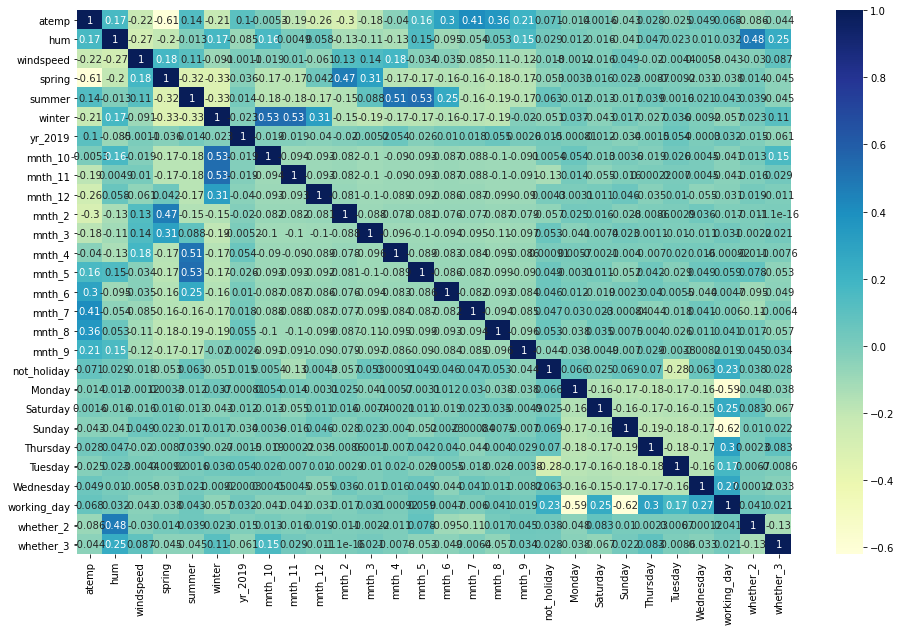

In [332]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [286]:
y_train = df_train.pop('cnt')
X_train = df_train

In [287]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [288]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [289]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('mnth_2', False, 5),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 6),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('not_holiday', True, 1),
 ('Monday', False, 10),
 ('Saturday', False, 13),
 ('Sunday', False, 3),
 ('Thursday', False, 14),
 ('Tuesday', False, 11),
 ('Wednesday', False, 12),
 ('working_day', False, 4),
 ('whether_2', True, 1),
 ('whether_3', True, 1)]

In [290]:
col = X_train.columns[rfe.support_]
col

Index(['atemp', 'hum', 'windspeed', 'spring', 'winter', 'yr_2019', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'not_holiday',
       'whether_2', 'whether_3'],
      dtype='object')

In [291]:
X_train.columns[~rfe.support_]

Index(['summer', 'mnth_10', 'mnth_11', 'mnth_12', 'mnth_2', 'mnth_7', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'working_day'],
      dtype='object')

In [292]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [301]:
X_train_rfe.shape

(510, 16)

In [293]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [294]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [295]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          8.06e-186
Time:                        13:19:09   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2150      0.042      5.119      

### From above summery we can get that there is not variable which have greater than 0.05 p-value(5% significance level)

In [296]:
#Let see VIF values

In [298]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,working_day,inf
21,Sunday,inf
19,Monday,inf
18,not_holiday,inf
0,atemp,39.58
1,hum,36.12
5,winter,11.28
4,summer,9.35
3,spring,9.01
16,mnth_8,8.58


### This shows a perfect correlation between two independent variables. In the case of perfect correlation, we get R2 =1, which lead to 1/(1-R2) infinity. To solve this problem we need to drop one of the variables from the dataset which is causing this perfect multicollinearity.

In [310]:
X_train=X_train.drop('working_day',axis=1)
X_train.head()

,atemp,hum,windspeed,spring,summer,winter,yr_2019,mnth_10,mnth_11,mnth_12,...,mnth_9,not_holiday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,whether_2,whether_3
653,0.501133,0.575354,0.300794,0,0,1,1,1,0,0,...,0,1,0,0,0,0,0,1,0,0
576,0.766351,0.725633,0.264686,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
426,0.438975,0.640189,0.255342,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
728,0.200348,0.498067,0.663106,1,0,0,1,0,0,1,...,0,1,1,0,0,0,0,0,0,0
482,0.391735,0.504508,0.188475,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [311]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 4),
 ('winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 7),
 ('mnth_12', False, 8),
 ('mnth_2', False, 6),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', True, 1),
 ('mnth_7', False, 5),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('not_holiday', True, 1),
 ('Monday', False, 3),
 ('Saturday', False, 11),
 ('Sunday', False, 12),
 ('Thursday', False, 13),
 ('Tuesday', False, 9),
 ('Wednesday', False, 10),
 ('whether_2', True, 1),
 ('whether_3', True, 1)]

In [312]:
col = X_train.columns[rfe.support_]
col

Index(['atemp', 'hum', 'windspeed', 'spring', 'winter', 'yr_2019', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_8', 'mnth_9', 'not_holiday',
       'whether_2', 'whether_3'],
      dtype='object')

In [313]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [314]:
X_train_rfe.shape

(510, 15)

In [315]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          8.06e-186
Time:                        13:32:10   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2150      0.042      5.119      

In [316]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,39.58
1,hum,36.12
18,not_holiday,32.28
5,winter,11.28
4,summer,9.35
3,spring,9.01
16,mnth_8,8.58
15,mnth_7,7.79
13,mnth_5,6.61
14,mnth_6,6.30


### Still we have very high VIF values lets drop atemp

In [317]:
X_train=X_train.drop('atemp',axis=1)
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col

Index(['windspeed', 'spring', 'winter', 'yr_2019', 'mnth_10', 'mnth_3',
       'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'not_holiday', 'whether_2', 'whether_3'],
      dtype='object')

In [318]:
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     142.2
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          2.97e-168
Time:                        13:34:46   Log-Likelihood:                 464.65
No. Observations:                 510   AIC:                            -897.3
Df Residuals:                     494   BIC:                            -829.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2780      0.037      7.528      

In [319]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,not_holiday,32.19
0,hum,31.17
4,winter,11.28
3,summer,9.31
2,spring,9.01
1,windspeed,5.34
6,mnth_10,5.17
15,mnth_8,5.15
7,mnth_11,4.92
12,mnth_5,4.51


### Still have very big VIF

In [320]:
X_train=X_train.drop('not_holiday',axis=1)
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col
X_train_rfe = X_train[col]
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     141.2
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          1.30e-167
Time:                        13:36:10   Log-Likelihood:                 463.12
No. Observations:                 510   AIC:                            -894.2
Df Residuals:                     494   BIC:                            -826.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3821      0.038     10.113      0.0

In [321]:

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,hum,27.93
4,winter,10.37
3,summer,8.81
2,spring,7.24
1,windspeed,5.22
6,mnth_10,5.05
7,mnth_11,4.84
12,mnth_5,4.24
15,mnth_8,4.06
11,mnth_4,3.88


In [322]:
X_train=X_train.drop('hum',axis=1)
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col
X_train_rfe = X_train[col]
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     141.9
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          4.47e-168
Time:                        13:36:48   Log-Likelihood:                 464.23
No. Observations:                 510   AIC:                            -896.5
Df Residuals:                     494   BIC:                            -828.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3298      0.027     12.309      0.0

In [323]:

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,winter,9.36
2,summer,7.63
0,windspeed,5.11
5,mnth_10,4.35
1,spring,4.29
6,mnth_11,4.29
11,mnth_5,3.61
10,mnth_4,3.60
7,mnth_12,2.81
12,mnth_6,2.20


In [324]:
X_train=X_train.drop('winter',axis=1)
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col
X_train_rfe = X_train[col]
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     137.8
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          1.46e-165
Time:                        13:37:12   Log-Likelihood:                 458.22
No. Observations:                 510   AIC:                            -884.4
Df Residuals:                     494   BIC:                            -816.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3606      0.027     13.423      0.0

In [325]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,summer,7.41
0,windspeed,5.10
1,spring,3.68
10,mnth_5,3.61
9,mnth_4,3.60
11,mnth_6,2.20
8,mnth_3,2.08
18,Thursday,2.07
17,Sunday,2.06
3,yr_2019,2.02


In [326]:
X_train=X_train.drop('summer',axis=1)
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
col
X_train_rfe = X_train[col]
# Adding a constant variable  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit() 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     137.8
Date:                Sat, 28 Nov 2020   Prob (F-statistic):          1.46e-165
Time:                        13:37:46   Log-Likelihood:                 458.22
No. Observations:                 510   AIC:                            -884.4
Df Residuals:                     494   BIC:                            -816.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3606      0.027     13.423      0.0

In [327]:
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,windspeed,4.98
1,spring,3.07
17,Thursday,2.03
2,yr_2019,2.02
16,Sunday,2.01
8,mnth_4,1.99
14,Monday,1.95
18,Tuesday,1.95
3,mnth_10,1.89
19,Wednesday,1.87


What is VIF means: Lets connect do it for VIF 5
VIF=1/(1-r2)
5=1/(1-r2)
1-r2=1/5=0.2
r2=1-0.2=0.8
0.8 r2 is very high
If bedrooms is our target variable then 80% of variance in bedrooms can be explained by all the other  predictor variables.

Thats we drop these variables which have VIF >5 or should say more than 80% r2

### Now look at VIF. No variable have VIF greater than 5 which is pretty good.(Few people takes VIF 2 rather than 5 as good VIF)

### Now also look at p-value.  There is no variable which have p-value > 0.05. Which means significance level 5% remember p-value from hypothesis testing.

### This is also pretty good thing.

## Step 4: Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [330]:
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

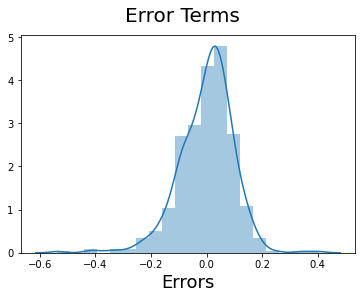

In [331]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

## Making Predictions

#### Applying the scaling on the test sets

In [334]:
num_vars = ['atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [335]:
df_test.head()

,atemp,hum,windspeed,cnt,spring,summer,winter,yr_2019,mnth_10,mnth_11,...,not_holiday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,working_day,whether_2,whether_3
184,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
535,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
299,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1,0,...,1,0,0,0,0,0,0,1,1,0
221,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
152,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [336]:
df_test.describe()

,atemp,hum,windspeed,cnt,spring,summer,winter,yr_2019,mnth_10,mnth_11,...,not_holiday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,working_day,whether_2,whether_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.479452,0.082192,0.073059,...,0.963470,0.146119,0.178082,0.118721,0.100457,0.127854,0.164384,0.698630,0.319635,0.027397
std,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.500722,0.275286,0.260830,...,0.188034,0.354034,0.383458,0.324202,0.301297,0.334692,0.371472,0.459904,0.467403,0.163612
min,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### check there is one difference between max value of train and test set. Max value were 1 for train set while in test set this varry. 

In [337]:
y_test=df_test.pop('cnt')
X_test=df_test

In [342]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [339]:
X_test_sm=X_test_sm.drop(["summer","winter", "hum", "not_holiday", "atemp", "working_day"],axis=1)

In [343]:
# Making predictions
y_pred = lm.predict(X_test_new)

ValueError: shapes (219,23) and (16,) not aligned: 23 (dim 1) != 16 (dim 0)